## Bonus Questions for SQL analysis - analyzing data with Pandas
#### By: Skip Hobba

In [5]:
#Imports that will be used throughout data analysis
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

#Connect to SQL database (removed user/password)
engine = create_engine('postgresql://<username>:<password>@localhost:5432/<database_name>')
connection = engine.connect()

In [2]:
#Create dataframe with salary information
salary_data = pd.read_sql("SELECT salary FROM salaries", connection)
salary_data.head()

,salary
0,60117.0
1,65828.0
2,40006.0
3,40054.0
4,78228.0


In [3]:
#Create dataframe with title and salary information
title_data = pd.read_sql("SELECT ttl.title, sal.salary FROM salaries sal left join titles ttl on sal.emp_no = ttl.emp_no", connection)
title_data.head()

,title,salary
0,Senior Staff,78228.0
1,Staff,78228.0
2,Engineer,72488.0
3,Staff,42365.0
4,Engineer,55881.0


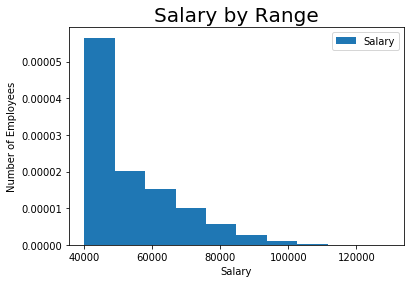

In [12]:
#Plot salary in histogram format - save output to salary_range.png
#I couldn't get figsize to work with plt.hist - will work on it later
plt.hist(salary_data['salary'], density=True, bins=10, label="Salary")
plt.legend(loc="upper right")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.title("Salary by Range", fontsize = 20)
plt.savefig("salary_range.png")

In [7]:
#Create grouped data frame with average salary information
salary_group = title_data.groupby('title')
title_df = pd.DataFrame({'Avg_Salary': salary_group["salary"].mean()})
title_df

,Avg_Salary
title,
Assistant Engineer,48493.204786
Engineer,48539.781423
Manager,51531.041667
Senior Engineer,48506.751806
Senior Staff,58503.286614
Staff,58465.271904
Technique Leader,48580.505772


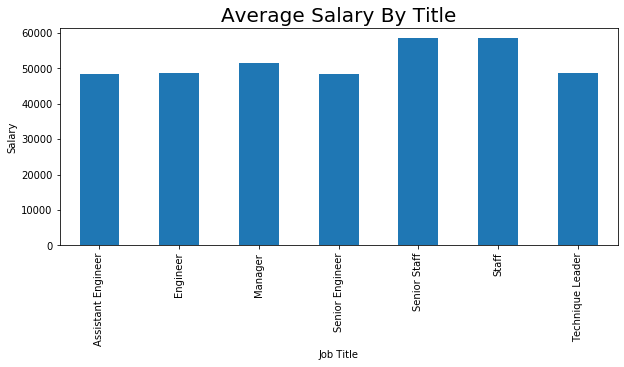

In [8]:
# Generate a bar plot the average salary by job title
title_df.plot(kind='bar', legend=False,  figsize = (10,4))
plt.xlabel("Job Title")
plt.ylabel("Salary")
plt.title("Average Salary By Title", fontsize = 20)
plt.savefig("salary_title.png")
plt.show()

In [13]:
#My Info - hahaha  
my_data = pd.read_sql("SELECT * FROM employees where emp_no = '499942'", connection)
my_data

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,499942,1963-01-10,April,Foolsday,F,1997-02-10
